# Tasks

In [196]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re
import numpy as np

In [197]:
df1 = pd.read_csv('./Dataset/demographic.csv')
df2 = pd.read_csv('./Dataset/diet.csv')
df3 = pd.read_csv('./Dataset/examination.csv')
df4 = pd.read_csv('./Dataset/labs.csv')

In [198]:
df1.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [199]:
df2.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [200]:
df3.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [ ]:
df4.head()

In [202]:
# Join the dataframes on suitable column
merged_df = df1.merge(df2, on='SEQN', how='inner') \
              .merge(df3, on='SEQN', how='inner') \
              .merge(df4, on='SEQN', how='inner')


In [203]:
merged_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


## Exploratory data analysis


Now, we will explore the data to gain insights about the data.

In [204]:
## get some useful info about dataset like: Shape, statistics and some rows of data

In [205]:
print("Shape of the merged DataFrame:", merged_df.shape)  # Shape of the DataFrame

Shape of the merged DataFrame: (9813, 860)


In [206]:
print("Descriptive Statistics:\n", merged_df.describe())  # Descriptive statistics of the DataFrame

Descriptive Statistics:
                SEQN  SDDSRVYR  RIDSTATR     RIAGENDR     RIDAGEYR    RIDAGEMN  \
count   9813.000000    9813.0    9813.0  9813.000000  9813.000000  642.000000   
mean   78644.559971       8.0       2.0     1.507694    31.629573   10.258567   
std     2938.592266       0.0       0.0     0.499966    24.397553    6.815038   
min    73557.000000       8.0       2.0     1.000000     0.000000    0.000000   
25%    76092.000000       8.0       2.0     1.000000    10.000000    5.000000   
50%    78643.000000       8.0       2.0     2.000000    27.000000    9.000000   
75%    81191.000000       8.0       2.0     2.000000    52.000000   16.000000   
max    83731.000000       8.0       2.0     2.000000    80.000000   24.000000   

          RIDRETH1     RIDRETH3     RIDEXMON     RIDEXAGM  ...       URXUTL  \
count  9813.000000  9813.000000  9813.000000  4213.000000  ...  2664.000000   
mean      3.083766     3.277897     1.508509   107.478519  ...     0.186950   
std     

In [207]:
print("First 10 rows of the merged DataFrame:\n", merged_df.head(10))

First 10 rows of the merged DataFrame:
     SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  73557         8         2         1        69       NaN         4   
1  73558         8         2         1        54       NaN         3   
2  73559         8         2         1        72       NaN         3   
3  73560         8         2         1         9       NaN         3   
4  73561         8         2         2        73       NaN         3   
5  73562         8         2         1        56       NaN         1   
6  73563         8         2         1         0       5.0         3   
7  73564         8         2         2        61       NaN         3   
8  73566         8         2         2        56       NaN         3   
9  73567         8         2         1        65       NaN         3   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  URXUTL  URDUTLLC  URXUTU  URDUTULC  \
0         4       1.0       NaN  ...     NaN       NaN     NaN       NaN   
1         3    

## DROP columns with fixed values

Drop columns with fixed values (There is just one unique value)

In [208]:
dropcols = [col for col in merged_df.columns if merged_df[col].nunique() == 1]
merged_df.drop(dropcols, axis=1, inplace=True)

In [209]:
print(f"Dropped columns: {dropcols}")

Dropped columns: ['SDDSRVYR', 'RIDSTATR', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350K', 'DRD370V', 'BMIRECUM', 'BMILEG', 'BMIARML', 'BMIARMC', 'BMIWAIST', 'CSQ260D', 'CSQ260G', 'CSQ260I', 'CSQ260N', 'CSQ260M', 'URDP02LC', 'LBDBPBLC', 'LBDBSELC', 'LBDBMNLC', 'URDUCSLC', 'URDUMOLC']


In [210]:
print(f"New shape of the merged DataFrame: {merged_df.shape}")

New shape of the merged DataFrame: (9813, 828)


## Explore Variables

Treating with NaN values in columns and combination of 7 and 9 as NaN by applying function on each element

In [211]:
def replace_with_nan(element):
  try:
    if re.match(pattern, str(int(element))):
        return np.nan
    return element
  except:
    return element

In [212]:
pattern = r'^7+$'
merged_df = merged_df.applymap(replace_with_nan)

C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\3855009962.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(replace_with_nan)


In [213]:
pattern = r'^9+$'
merged_df = merged_df.applymap(replace_with_nan)

C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\1905811923.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(replace_with_nan)


In [214]:
'''
drop columns from the DataFrame merged_df that have 30% of the total number of rows with NAN values.
'''
merged_df.dropna(thresh=0.7 * len(merged_df) , axis=1, inplace=True)

In [215]:
print("Shape of the merged DataFrame:", merged_df.shape)  # Shape of the DataFrame

Shape of the merged DataFrame: (9813, 275)


In [216]:
print("Descriptive Statistics:\n", merged_df.describe())  # Descriptive statistics of the DataFrame

Descriptive Statistics:
                SEQN     RIAGENDR     RIDAGEYR     RIDRETH1     RIDRETH3  \
count   9812.000000  9813.000000  9350.000000  9813.000000  9370.000000   
mean   78644.648390     1.507694    32.543529     3.083766     3.101921   
std     2938.728968     0.499966    24.299566     1.262812     1.421878   
min    73557.000000     1.000000     0.000000     1.000000     1.000000   
25%    76091.750000     1.000000    11.000000     2.000000     2.000000   
50%    78643.500000     2.000000    29.000000     3.000000     3.000000   
75%    81191.250000     2.000000    53.000000     4.000000     4.000000   
max    83731.000000     2.000000    80.000000     5.000000     6.000000   

          RIDEXMON     DMDBORN4     DMDCITZN      SIALANG     SIAPROXY  ...  \
count  9813.000000  9809.000000  9802.000000  9813.000000  9812.000000  ...   
mean      1.508509     1.188806     1.093960     1.106491     1.634427  ...   
std       0.499953     0.391375     0.291789     0.308481     

In [217]:
print("First 10 rows of the merged DataFrame:\n", merged_df.head(10))

First 10 rows of the merged DataFrame:
       SEQN  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  RIDEXMON  DMDBORN4  \
0  73557.0         1      69.0         4       4.0       1.0       1.0   
1  73558.0         1      54.0         3       3.0       1.0       1.0   
2  73559.0         1      72.0         3       3.0       2.0       1.0   
3  73560.0         1       NaN         3       3.0       1.0       1.0   
4  73561.0         2      73.0         3       3.0       1.0       1.0   
5  73562.0         1      56.0         1       1.0       1.0       1.0   
6  73563.0         1       0.0         3       3.0       2.0       1.0   
7  73564.0         2      61.0         3       3.0       2.0       1.0   
8  73566.0         2      56.0         3       3.0       1.0       1.0   
9  73567.0         1      65.0         3       3.0       2.0       1.0   

   DMDCITZN  SIALANG  SIAPROXY  ...  LBXHBC  LBDHBG  LBDHD  LBDHEG  LBDHEM  \
0       1.0        1       2.0  ...     1.0     2.0    2.0     2.0 

## Types of variables
In this section, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object and int64. Numerical variables have data type float64.

For columns with dtype int64, if our unique values are less than or equal 10, we will take them as categorical otherwise as numerical

First of all, we will find Numerical variables.

In [218]:
# Identify columns with data type 'object'
object_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

In [219]:
# Identify columns with data type 'int64'
int_cols = merged_df.select_dtypes(include=['int64']).columns.tolist()

In [220]:
categorical_int_cols = [
    col for col in int_cols
    if np.unique(merged_df[col].values).size <= 10
]

In [221]:
numerical_int_cols = [
    col for col in int_cols
    if np.unique(merged_df[col].values).size > 10
]

In [222]:
# Identify columns with data type 'float64'
float_cols = merged_df.select_dtypes(include=['float64']).columns.tolist()

In [223]:

numerical = float_cols + numerical_int_cols

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 235 numerical variables

The numerical variables are : ['SEQN', 'RIDAGEYR', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIAPROXY', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'WTINT2YR', 'WTMEC2YR', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'WTDRD1', 'WTDR2D', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF',

In [224]:
merged_df[numerical].head()

,SEQN,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,...,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1,SDMVSTRA
0,73557.0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821,112
1,73558.0,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636,108
2,73559.0,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN,109
3,73560.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575,109
4,73561.0,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109,116


**Categorical columns**

In [225]:
categorical = object_cols + categorical_int_cols
merged_df[categorical].head()

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,...,SIALANG,SIAINTRP,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,SDMVPSU,DR1DRSTZ,PEASCST1,BMDSTATS
0,P,P,P,P,P,P,P,P,P,P,...,1,2,0,0,2,1,1,1,1,1
1,Z,J,S,S,S,S,S,S,S,S,...,1,2,0,2,0,1,1,1,1,1
2,Z,Z,Z,S,S,S,S,Z,S,S,...,1,2,0,0,2,1,1,1,1,1
3,U,S,D,K,U,S,S,S,S,U,...,1,2,0,2,0,1,2,1,1,1
4,E,Z,E,Z,Z,Z,R,R,Z,Z,...,1,2,0,0,2,1,2,1,1,3


## Explore Numerical values

In [226]:
merged_df[numerical].isnull().sum()

SEQN           1
RIDAGEYR     463
RIDRETH3     443
RIDEXMON       0
DMDBORN4       4
            ... 
LBDTCSI     2325
LBXTTG      2236
URXVOL1     1869
URDFLOW1    2672
SDMVSTRA       0
Length: 235, dtype: int64

## Outliers in numerical variables

view summary statistics in numerical variables

In [227]:
print(round(merged_df[numerical].describe()), 2)
def find_outlier_cols(df):
    outlier_cols = []

    # iterate over features(columns)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any values fall outside of bounds
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].any(axis=None):
            outlier_cols.append(col)

    return outlier_cols

outlier_cols = find_outlier_cols(merged_df[numerical])
print(outlier_cols)
len(outlier_cols), len(numerical)

          SEQN  RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  \
count   9812.0    9350.0    9370.0    9813.0    9809.0    9802.0    9812.0   
mean   78645.0      33.0       3.0       2.0       1.0       1.0       2.0   
std     2939.0      24.0       1.0       0.0       0.0       0.0       0.0   
min    73557.0       0.0       1.0       1.0       1.0       1.0       1.0   
25%    76092.0      11.0       2.0       1.0       1.0       1.0       1.0   
50%    78644.0      29.0       3.0       2.0       1.0       1.0       2.0   
75%    81191.0      53.0       4.0       2.0       1.0       1.0       2.0   
max    83731.0      80.0       6.0       2.0       2.0       2.0       2.0   

       FIALANG  FIAPROXY  FIAINTRP  ...  LBDHBG   LBDHD  LBDHEG  LBDHEM  \
count   9712.0    9712.0    9712.0  ...  7652.0  7652.0  7656.0  7656.0   
mean       1.0       2.0       2.0  ...     2.0     2.0     2.0     2.0   
std        0.0       0.0       0.0  ...     0.0     0.0     0.0     0.0 

(202, 235)

Text(0, 0.5, 'HIST')

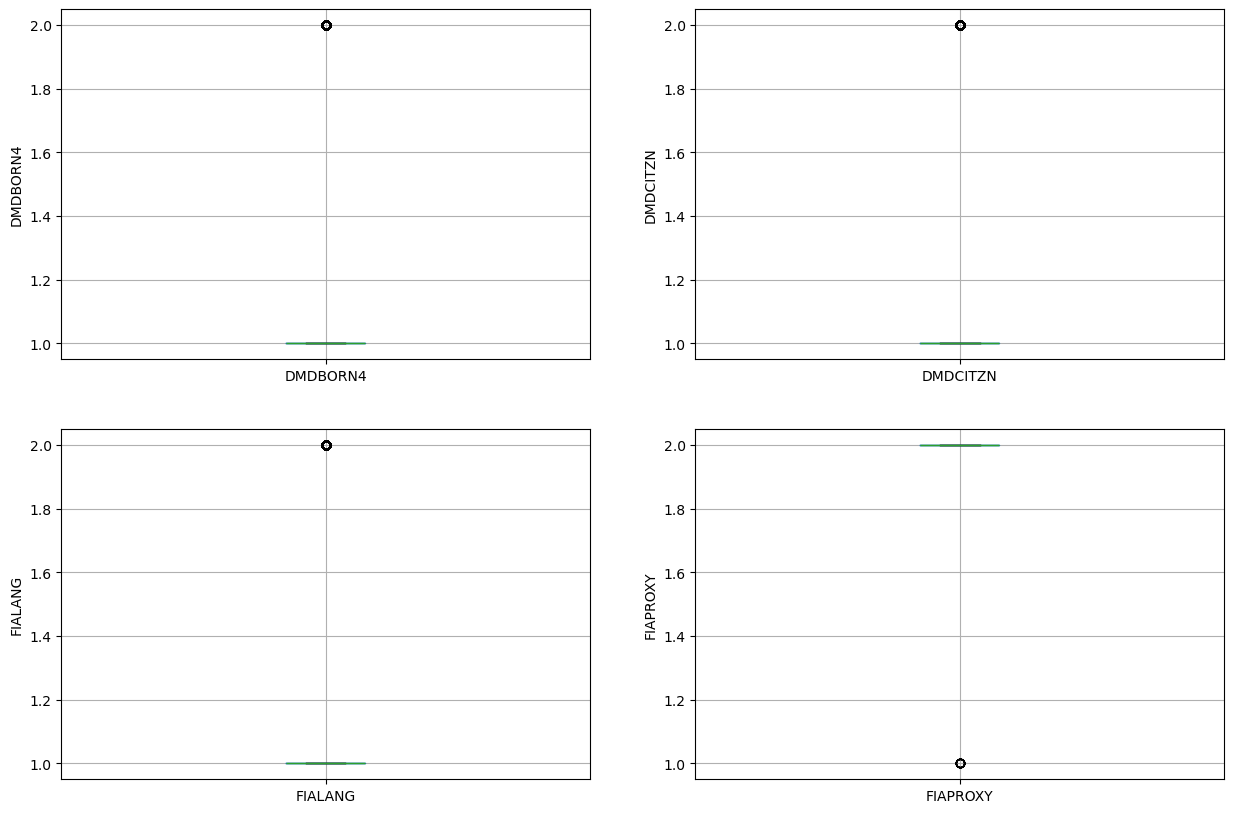

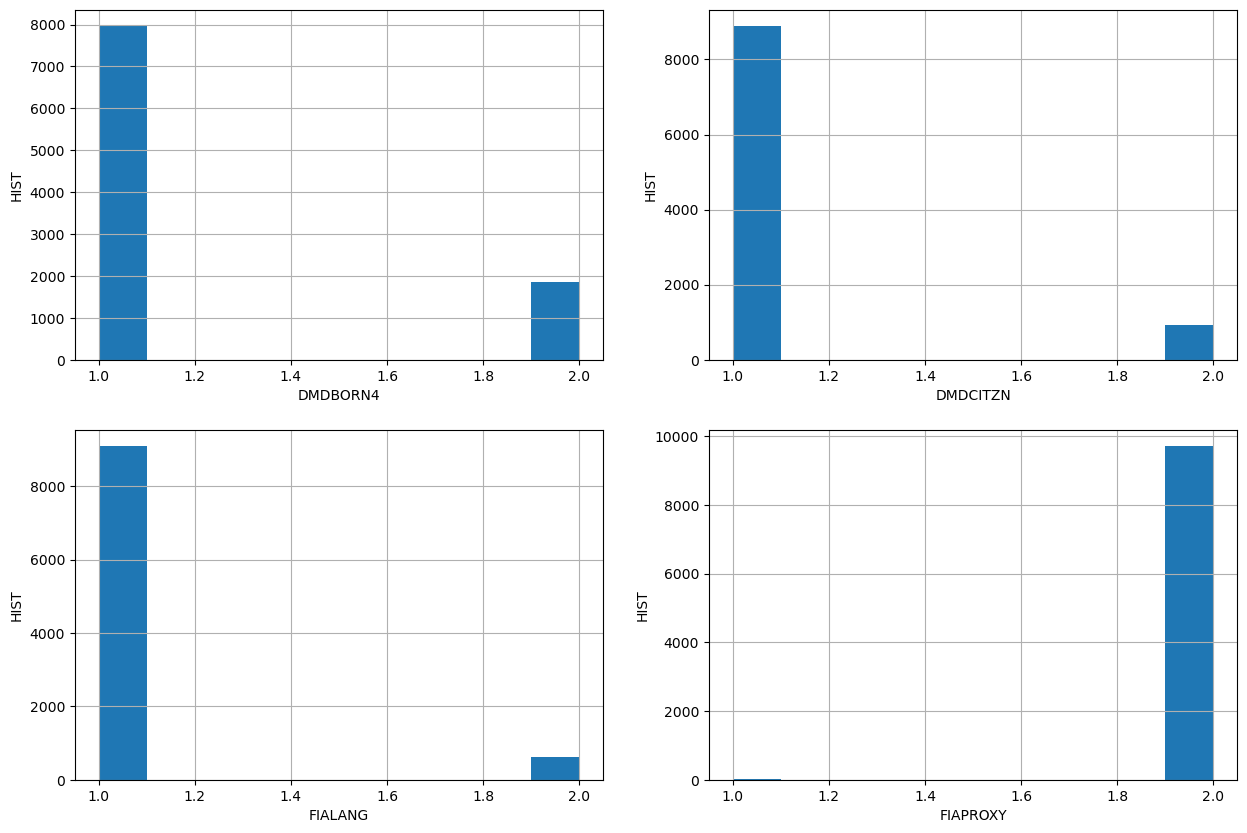

In [228]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.boxplot(column='DMDBORN4')
fig.set_title('')
fig.set_ylabel('DMDBORN4')


plt.subplot(2, 2, 2)
fig = merged_df.boxplot(column='DMDCITZN')
fig.set_title('')
fig.set_ylabel('DMDCITZN')


plt.subplot(2, 2, 3)
fig = merged_df.boxplot(column='FIALANG')
fig.set_title('')
fig.set_ylabel('FIALANG')


plt.subplot(2, 2, 4)
fig = merged_df.boxplot(column='FIAPROXY')
fig.set_title('')
fig.set_ylabel('FIAPROXY')
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.DMDBORN4.hist(bins=10)
fig.set_xlabel('DMDBORN4')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 2)
fig = merged_df.DMDCITZN.hist(bins=10)
fig.set_xlabel('DMDCITZN')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 3)
fig = merged_df.FIALANG.hist(bins=10)
fig.set_xlabel('FIALANG')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 4)
fig = merged_df.FIAPROXY.hist(bins=10)
fig.set_xlabel('FIAPROXY')
fig.set_ylabel('HIST')

## Declare feature vector and target variable

In [229]:
target = pd.read_csv('./Dataset/questionnaire.csv')

Convert combination of 7 and 9 to NaN

In [230]:
pattern = r'^9+$'
target = target.applymap(replace_with_nan)

C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\101255036.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


In [231]:
pattern = r'^7+$'
target = target.applymap(replace_with_nan)

C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\1210207755.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


Doing right join to reach same rows in target and data dfs

In [232]:
liver_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ160L']]
cancer_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ220']]

In [ ]:
target.head()

,SEQN,MCQ160L,MCQ220
0,73557.0,2.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,1.0
3,73560.0,NaN,NaN
4,73561.0,2.0,2.0


In [ ]:
merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,1,NaN,3,3.0,1.0,1.0,1.0,1,1.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


In [235]:
liver_values.head()

,SEQN,MCQ160L
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
3,73560.0,NaN
4,73561.0,2.0


In [236]:
cancer_values.head()

,SEQN,MCQ220
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73560.0,NaN
4,73561.0,2.0


Drop NaN values from target dfs

In [237]:
cancer_values.dropna(subset=['MCQ220'], inplace=True)
liver_values.dropna(subset=['MCQ160L'], inplace=True)

In [238]:
cancer_values.head()

,SEQN,MCQ220
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
4,73561.0,2.0
5,73562.0,2.0


In [239]:
liver_values.head()

,SEQN,MCQ160L
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
4,73561.0,2.0
5,73562.0,2.0


Doing left join to drop the same rows which were dropped in previous step in data dfs

In [240]:
final_liver_data = liver_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ160L'], axis=1)
final_cancer_data = cancer_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ220'], axis=1)
cancer_values = cancer_values.drop(['SEQN'], axis=1)
liver_values = liver_values.drop(['SEQN'], axis=1)

In [241]:
final_liver_data.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,SIAINTRP,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,2,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109
4,1,56.0,1,1.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,226.0,5.84,2.0,197.0,1.187


In [242]:
final_cancer_data.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,SIAINTRP,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,2,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109
4,1,56.0,1,1.0,1.0,1.0,1.0,1,2.0,2,...,2.0,2.0,2.0,2.0,2.0,226.0,5.84,2.0,197.0,1.187


## Feature Engineering
**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. We will carry out feature engineering on different types of variables.

First, We will display the categorical and numerical variables again separately.

In [243]:
def segregate_columns(df):
    # Identify columns with dtype 'object'
    object_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Identify columns with dtype 'int64'
    int_cols = df.select_dtypes(include=['int64']).columns.tolist()
    
    # Determine which int64 columns are categorical based on unique values using NumPy
    categorical_int_cols = [
        col for col in int_cols
        if np.unique(df[col].values).size <= 10
    ]
    
    # Combine object columns and categorical int64 columns to form the categorical list
    categorical = object_cols + categorical_int_cols
    
    # Identify numerical columns
    float_cols = df.select_dtypes(include=['float64']).columns.tolist()
    numerical_int_cols = [
        col for col in int_cols
        if np.unique(df[col].values).size > 10
    ]
    numerical = float_cols + numerical_int_cols
    
    return categorical, numerical

In [244]:
cancer_categorical, cancer_numerical = segregate_columns(final_cancer_data)

print("Cancer Data - Categorical Columns:")
print(final_cancer_data[cancer_categorical].head())



Cancer Data - Categorical Columns:
  OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
0        P        P        P        P        P        P        P        P   
1        Z        J        S        S        S        S        S        S   
2        Z        Z        Z        S        S        S        S        Z   
3        E        Z        E        Z        Z        Z        R        R   
4        Z        Z        R        Z        R        R        Y        Y   

  OHX10CTC OHX11CTC  ... SIALANG SIAINTRP DMDHHSZA DMDHHSZB DMDHHSZE DMDHRGND  \
0        P        P  ...       1        2        0        0        2        1   
1        S        S  ...       1        2        0        2        0        1   
2        S        S  ...       1        2        0        0        2        1   
3        Z        Z  ...       1        2        0        0        2        1   
4        Y        Y  ...       1        2        0        0        0        1   

  SDMVPSU DR1DR

In [245]:
liver_categorical, liver_numerical = segregate_columns(final_liver_data)

print("Liver Data - Categorical Columns:")
print(final_liver_data[liver_categorical].head())



Liver Data - Categorical Columns:
  OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
0        P        P        P        P        P        P        P        P   
1        Z        J        S        S        S        S        S        S   
2        Z        Z        Z        S        S        S        S        Z   
3        E        Z        E        Z        Z        Z        R        R   
4        Z        Z        R        Z        R        R        Y        Y   

  OHX10CTC OHX11CTC  ... SIALANG SIAINTRP DMDHHSZA DMDHHSZB DMDHHSZE DMDHRGND  \
0        P        P  ...       1        2        0        0        2        1   
1        S        S  ...       1        2        0        2        0        1   
2        S        S  ...       1        2        0        0        2        1   
3        Z        Z  ...       1        2        0        0        2        1   
4        Y        Y  ...       1        2        0        0        0        1   

  SDMVPSU DR1DRS

In [246]:
print("\nCancer Data - Numerical Columns:")
print(final_cancer_data[cancer_numerical].head())


Cancer Data - Numerical Columns:
   RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  FIALANG  \
0      69.0       4.0       1.0       1.0       1.0       2.0      1.0   
1      54.0       3.0       1.0       1.0       1.0       2.0      1.0   
2      72.0       3.0       2.0       1.0       1.0       2.0      1.0   
3      73.0       3.0       1.0       1.0       1.0       2.0      1.0   
4      56.0       1.0       1.0       1.0       1.0       2.0      1.0   

   FIAPROXY  FIAINTRP  MIALANG  ...  LBDHBG  LBDHD  LBDHEG  LBDHEM  LBXTC  \
0       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  167.0   
1       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  170.0   
2       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  126.0   
3       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  201.0   
4       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  226.0   

   LBDTCSI  LBXTTG  URXVOL1  URDFLOW1  SDMVSTRA  
0     4.

In [247]:

print("Liver Data - Numerical Columns:")
print(final_liver_data[liver_numerical].head())

Liver Data - Numerical Columns:
   RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  FIALANG  \
0      69.0       4.0       1.0       1.0       1.0       2.0      1.0   
1      54.0       3.0       1.0       1.0       1.0       2.0      1.0   
2      72.0       3.0       2.0       1.0       1.0       2.0      1.0   
3      73.0       3.0       1.0       1.0       1.0       2.0      1.0   
4      56.0       1.0       1.0       1.0       1.0       2.0      1.0   

   FIAPROXY  FIAINTRP  MIALANG  ...  LBDHBG  LBDHD  LBDHEG  LBDHEM  LBXTC  \
0       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  167.0   
1       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  170.0   
2       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  126.0   
3       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  201.0   
4       2.0       2.0      1.0  ...     2.0    2.0     2.0     2.0  226.0   

   LBDTCSI  LBXTTG  URXVOL1  URDFLOW1  SDMVSTRA  
0     4.32

In [248]:
# cancer_categorical = ##TODO
# print(final_cancer_data[cancer_categorical].head())
# liver_categorical = ##TODO
# print(final_liver_data[liver_categorical].head())
# cancer_numerical = ##TODO
# print(final_cancer_data[cancer_numerical].head())
# liver_numerical = ##TODO
# print(final_liver_data[liver_numerical].head())

## Engineering missing values in numerical variables

**Assumption**

We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, we will use median imputation because median imputation is robust to outliers.

We will impute missing values with the appropriate statistical measures of the data, in this case median.

In [249]:
# Engineering missing values in numerical variables for cancer data
for col in cancer_numerical:
    col_median = final_cancer_data[col].median()  # Calculate the median for the column
    final_cancer_data[col].fillna(col_median, inplace=True)  # Impute missing values with the median

# Engineering missing values in numerical variables for liver data
for col in liver_numerical:
    col_median = final_liver_data[col].median()  # Calculate the median for the column
    final_liver_data[col].fillna(col_median, inplace=True)  # Impute missing values with the median


C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\4175881769.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_median, inplace=True)  # Impute missing values with the median
C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\4175881769.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [250]:
print(final_cancer_data[cancer_numerical].isnull().sum())


RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
SDMVSTRA    0
Length: 234, dtype: int64


In [251]:
final_cancer_data[cancer_numerical].head()

,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,...,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1,SDMVSTRA
0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.8210,112
1,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.6360,108
2,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,0.6875,109
3,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.1090,116
4,56.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,226.0,5.84,2.0,197.0,1.1870,111


In [ ]:
print(final_liver_data[liver_numerical].isnull().sum())

RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
SDMVSTRA    0
Length: 234, dtype: int64


## Engineering missing values in categorical variables

We will impute missing categorical variables with most frequent value

In [253]:
# Impute missing values in categorical columns of final_cancer_data with the mode
for col in cancer_categorical:
    # Calculate the mode (most frequent value) of the column
    col_mode = final_cancer_data[col].mode()[0]
    
    # Fill missing values with the mode
    final_cancer_data[col].fillna(col_mode, inplace=True)

# Impute missing values in categorical columns of final_liver_data with the mode
for col in liver_categorical:
    # Calculate the mode (most frequent value) of the column
    col_mode = final_liver_data[col].mode()[0]
    
    # Fill missing values with the mode
    final_liver_data[col].fillna(col_mode, inplace=True)

C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\2992981546.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_mode, inplace=True)
C:\Users\Hadish\AppData\Local\Temp\ipykernel_29468\2992981546.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [254]:
# Verify that there are no remaining missing values in categorical columns
print("Missing values in Cancer Categorical Columns after imputation:")
print(final_cancer_data[cancer_categorical].isnull().sum())

Missing values in Cancer Categorical Columns after imputation:
OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
dtype: int64


In [255]:
print("Missing values in Liver Categorical Columns after imputation:")
print(final_liver_data[liver_categorical].isnull().sum())

Missing values in Liver Categorical Columns after imputation:
OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
dtype: int64


## Dummies the categorical cols
**Cancer Data**

In [256]:
final_cancer_data = pd.get_dummies(final_cancer_data,columns=cancer_categorical,drop_first=True)

In [257]:
final_cancer_data.head()

,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,...,DMDHHSZE_3,DMDHRGND_2,SDMVPSU_2,DR1DRSTZ_2,DR1DRSTZ_5,PEASCST1_2,PEASCST1_3,BMDSTATS_2,BMDSTATS_3,BMDSTATS_4
0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,True,False,False,False,False,False,True,False
4,56.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


**Liver Data**

In [258]:
final_liver_data = pd.get_dummies(final_liver_data, columns=liver_categorical, drop_first=True)

In [259]:
final_liver_data.head()

,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,...,DMDHHSZE_3,DMDHRGND_2,SDMVPSU_2,DR1DRSTZ_2,DR1DRSTZ_5,PEASCST1_2,PEASCST1_3,BMDSTATS_2,BMDSTATS_3,BMDSTATS_4
0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,True,False,False,False,False,False,True,False
4,56.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


## Feature selection

computing correlation coefficient

In [260]:
cancer_corr_matrix = final_cancer_data.corr()
liver_corr_matrix = final_liver_data.corr()

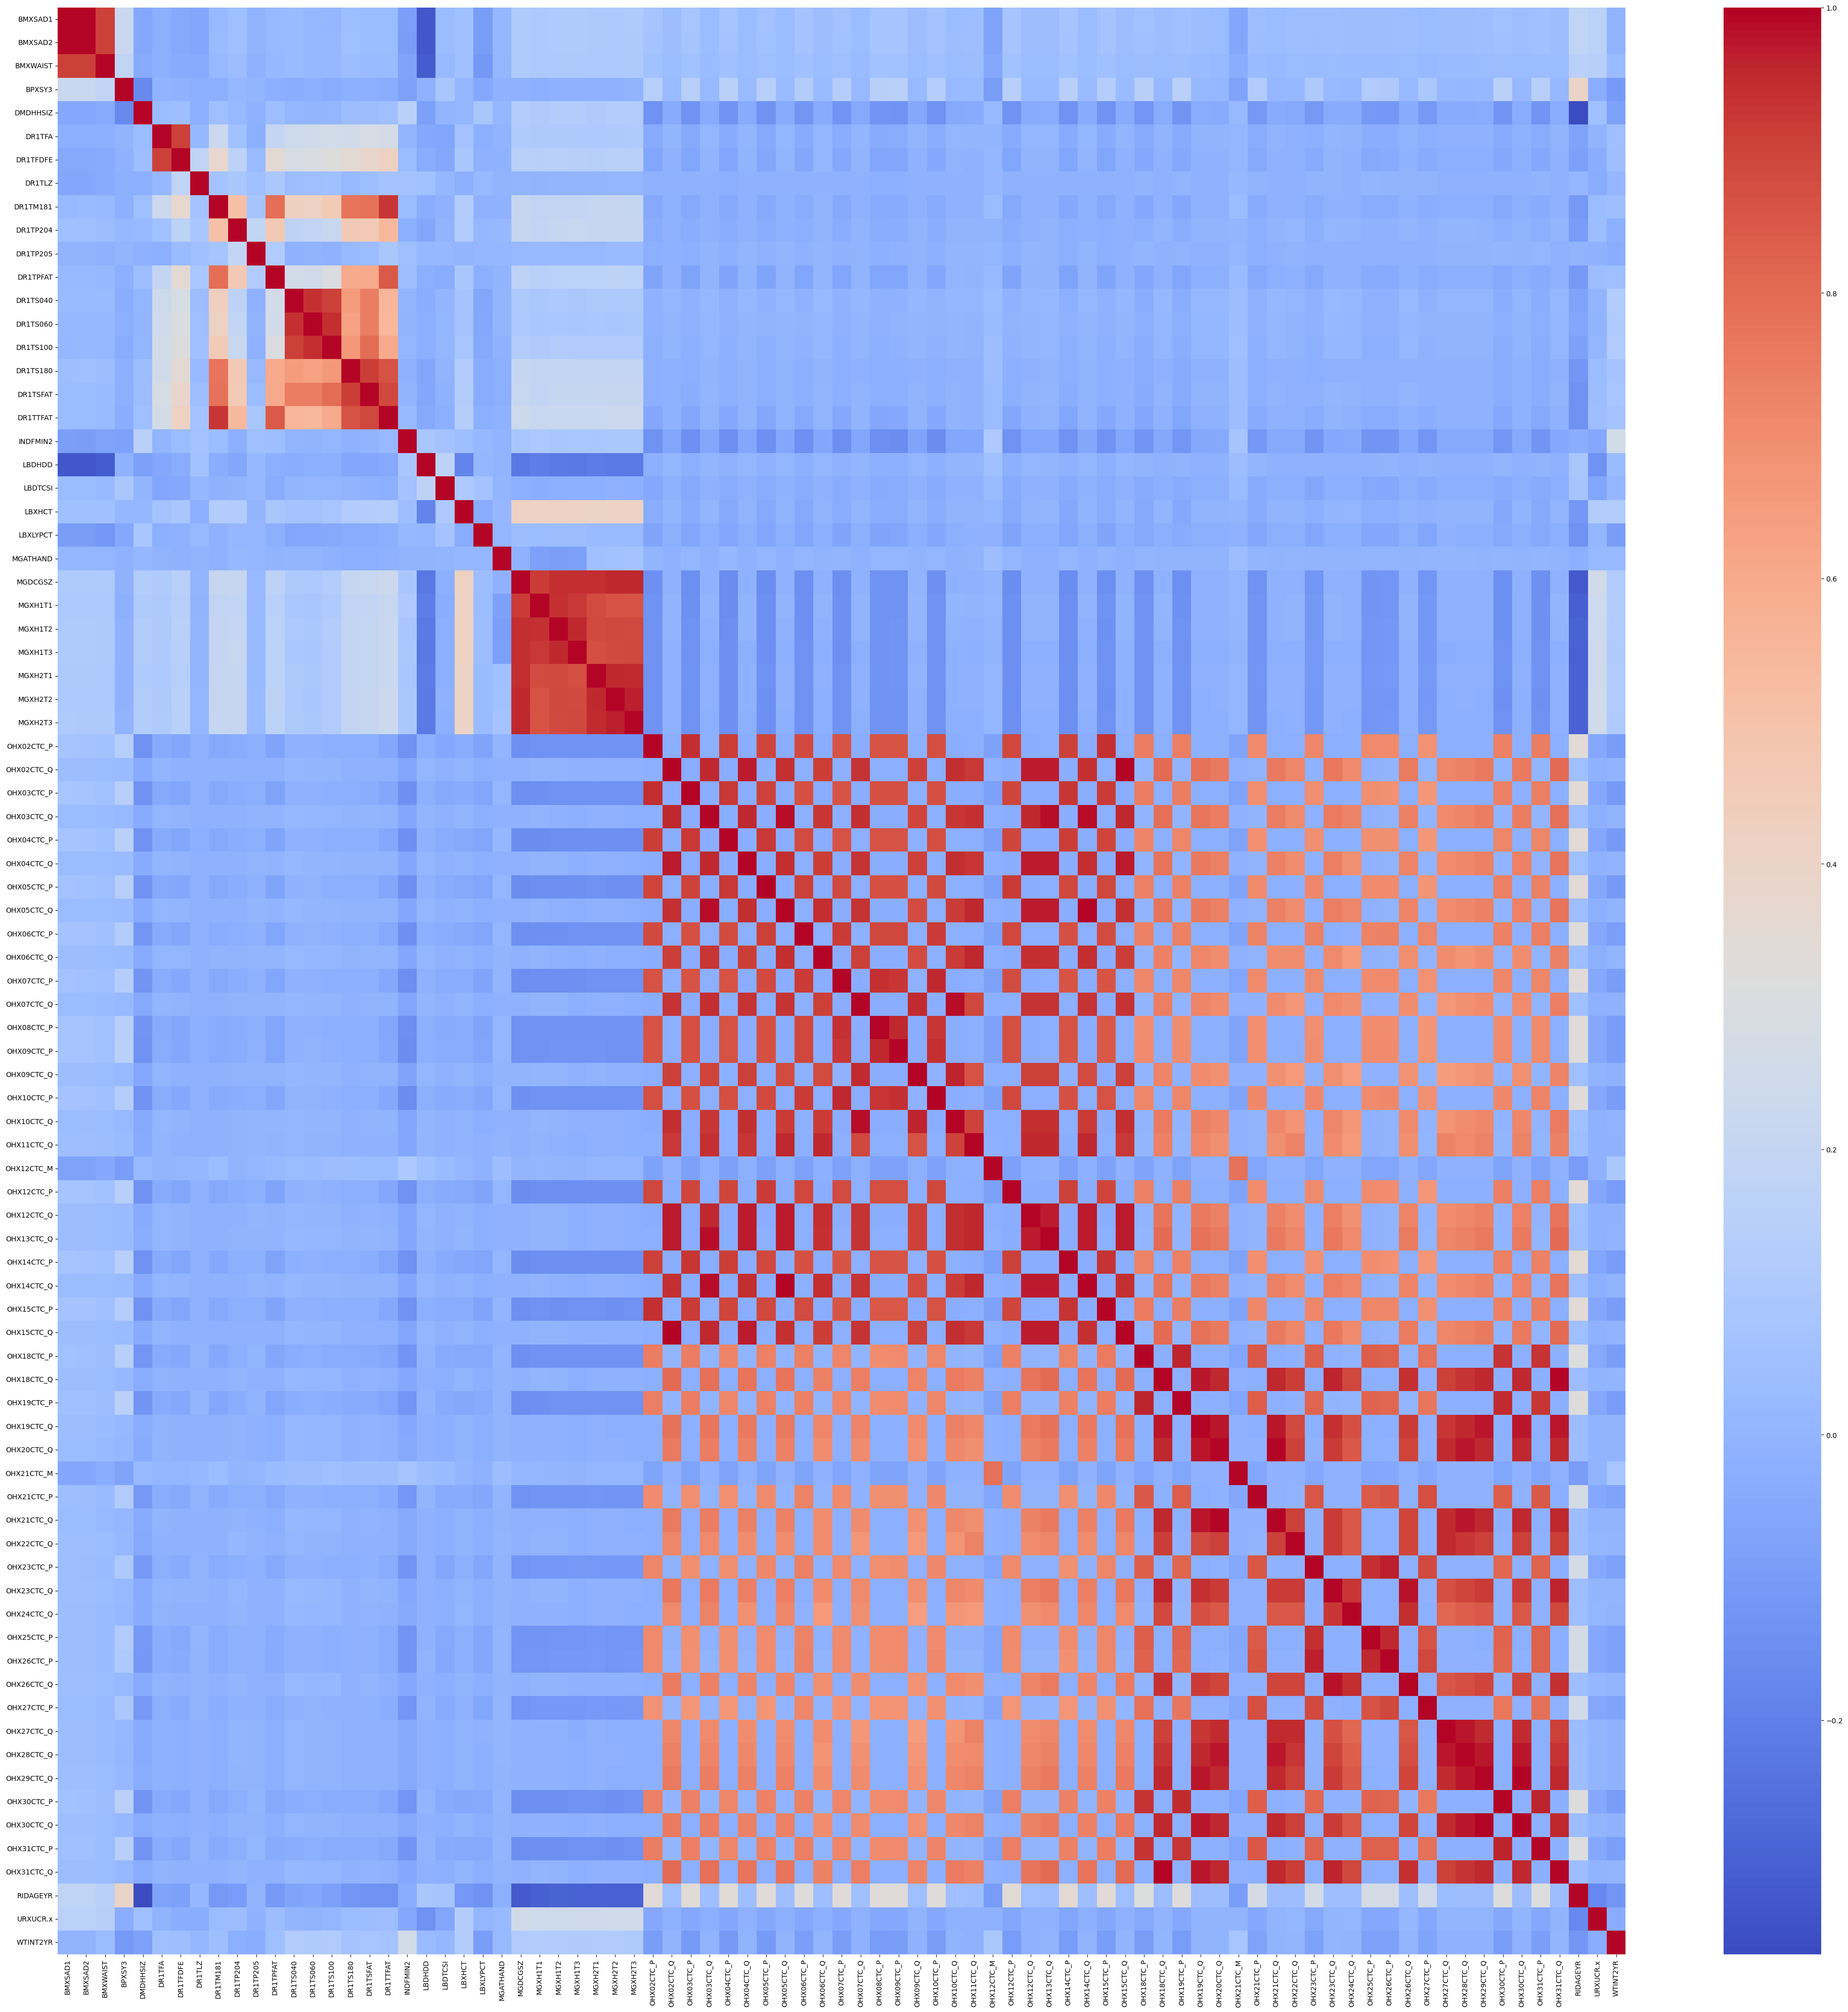

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

abs_corr_matrix = np.abs(cancer_corr_matrix)
cancer_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = cancer_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_cancer_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

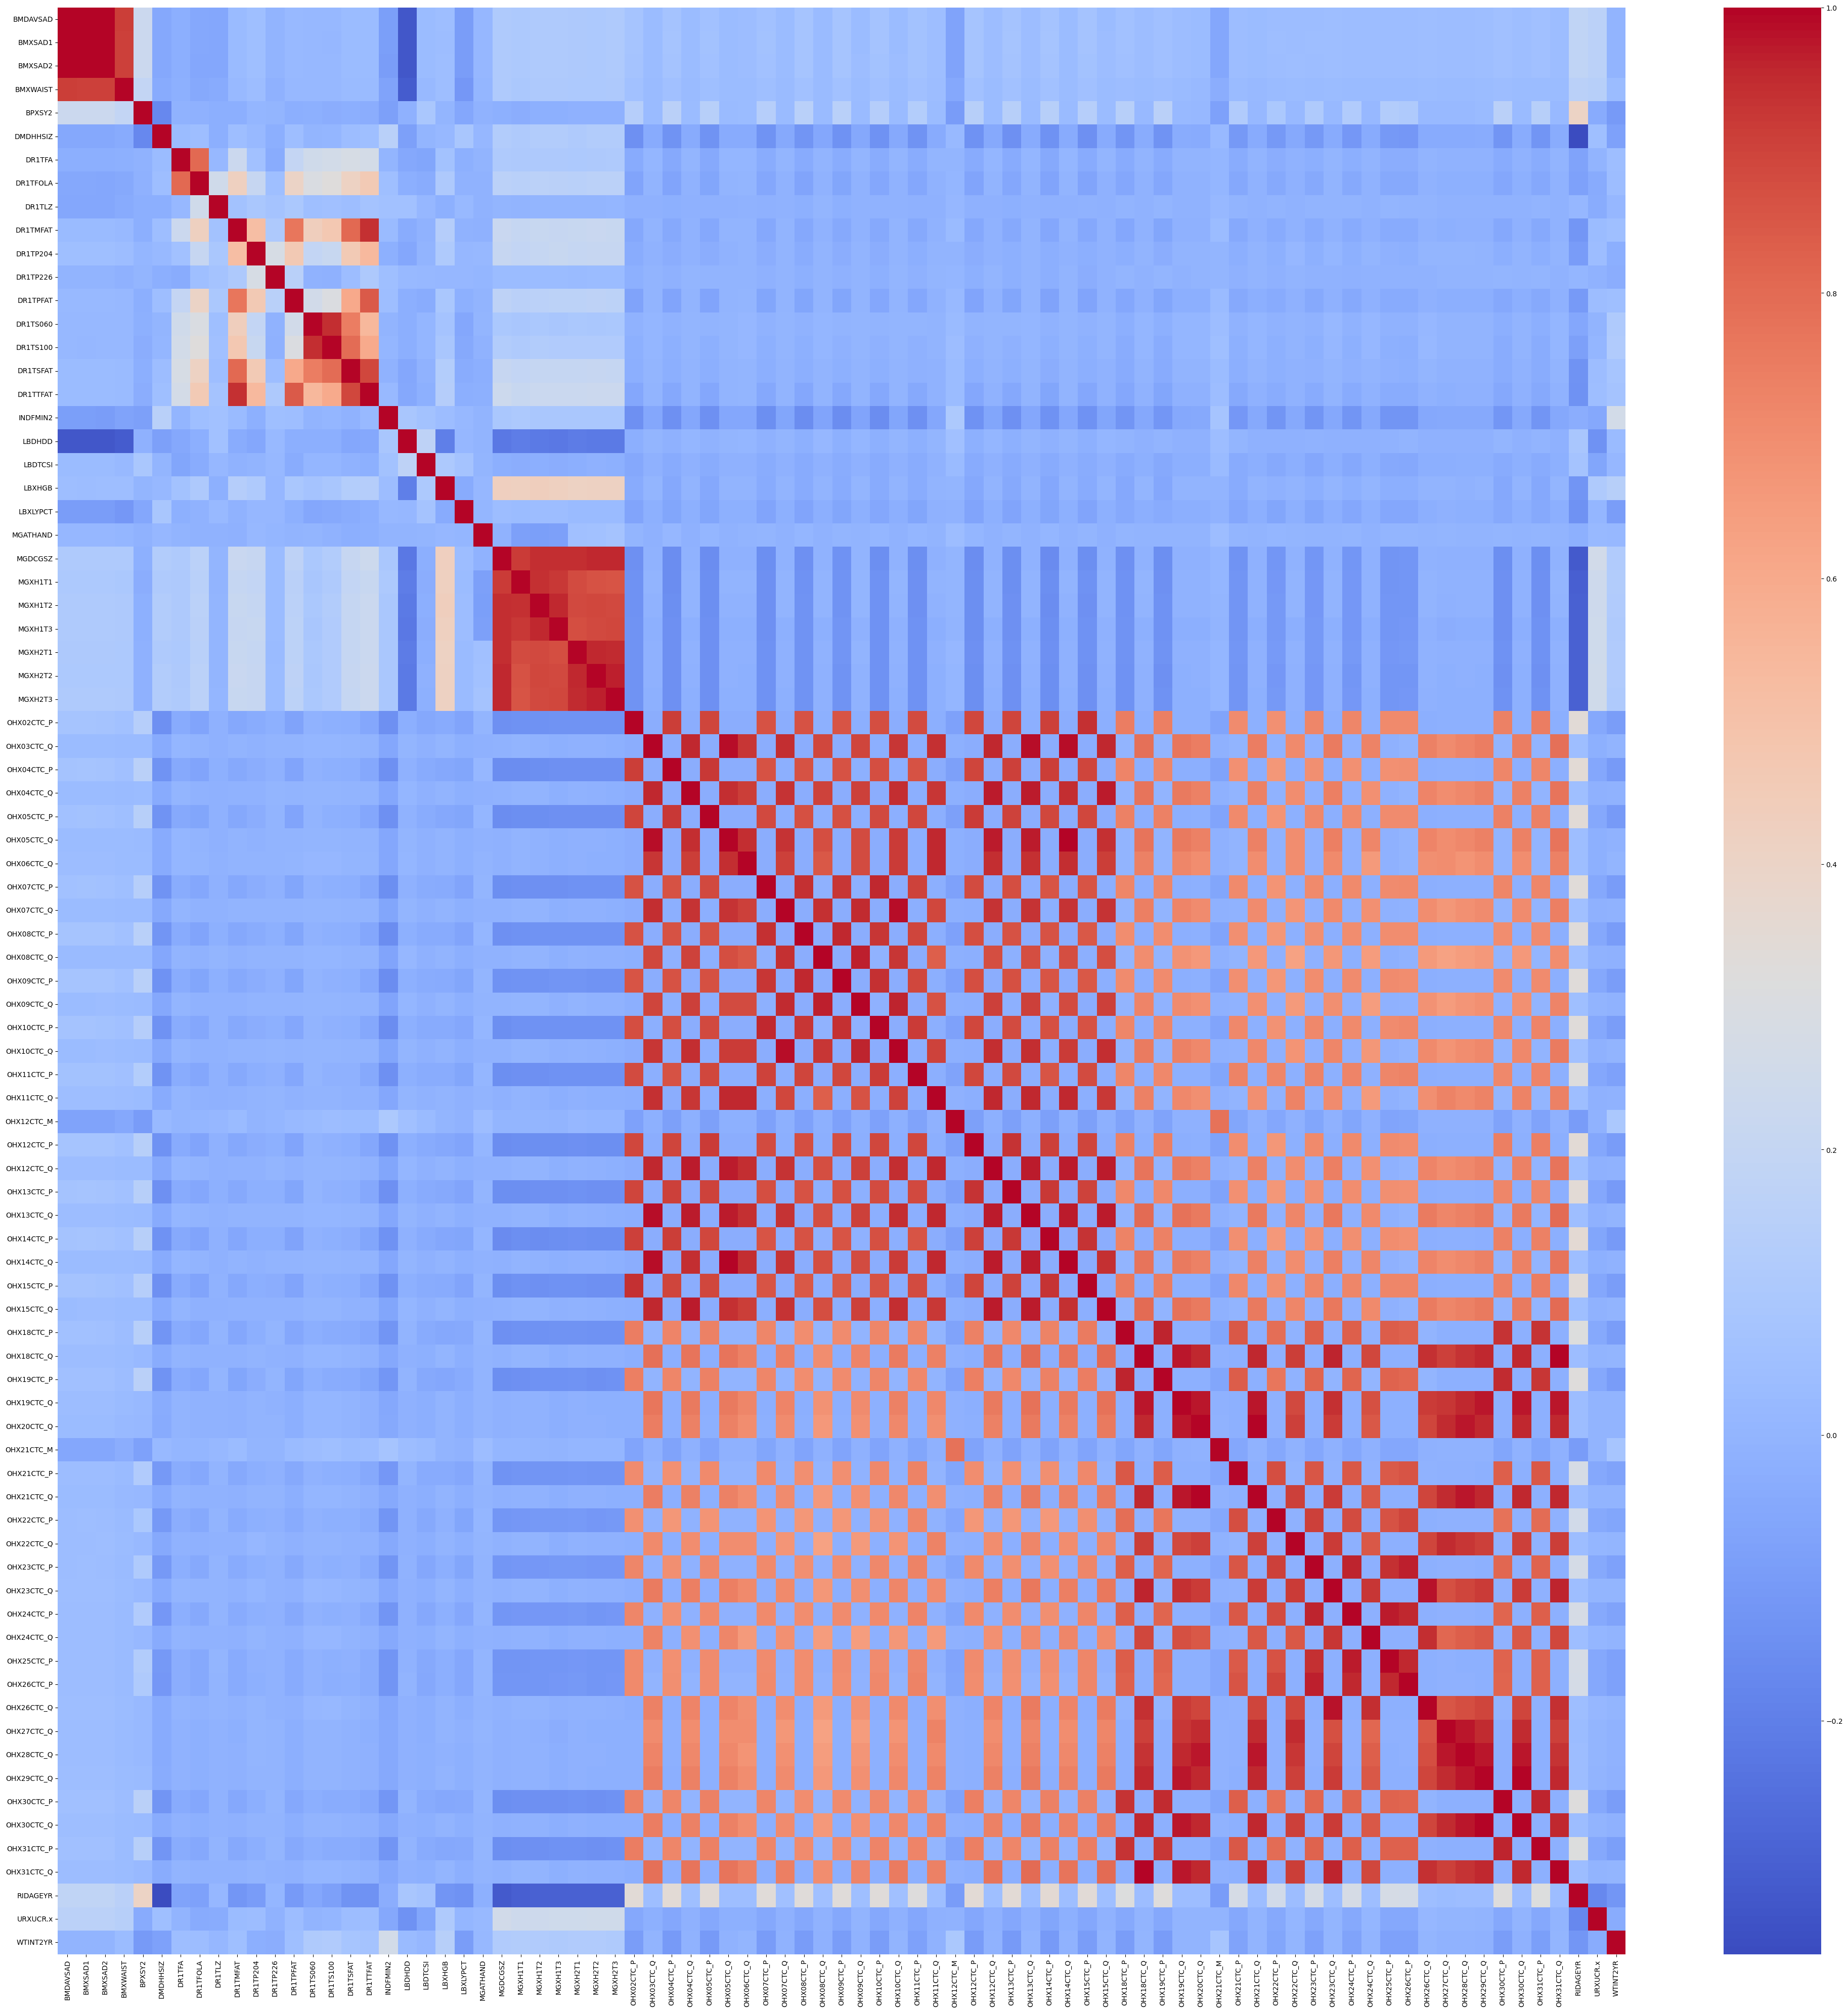

In [262]:
abs_corr_matrix = np.abs(liver_corr_matrix)
liver_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = liver_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_liver_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Selecting 150 features from original features according to their correlation coefficient

**Cancer**

In [263]:
import random


# Set your correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
high_corr_pairs = [(col1, col2) for col1 in cancer_corr_matrix.columns 
                   for col2 in cancer_corr_matrix.columns 
                   if col1 != col2 and abs(cancer_corr_matrix[col1][col2]) > threshold]


# Initialize an empty set to hold the selected features
selected_features = set()

# Loop through the high correlation pairs
for col1, col2 in high_corr_pairs:
    # Randomly select one feature from the pair
    selected_feature = random.choice([col1, col2])
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create a new DataFrame with only the selected features
selected_cancer_df = final_cancer_data[list(selected_features)]

**Liver**

In [264]:
# Set your correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
high_corr_pairs_liver = [(col1, col2) for col1 in liver_corr_matrix.columns 
                          for col2 in liver_corr_matrix.columns 
                          if col1 != col2 and abs(liver_corr_matrix[col1][col2]) > threshold]

# Initialize an empty set to hold the selected features
selected_features = set()

# Loop through the high correlation pairs
for col1, col2 in high_corr_pairs:
    # Randomly select one feature from the pair

    selected_feature = random.choice([col1, col2])
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create a new DataFrame with only the selected features
selected_liver_df = final_liver_data[list(selected_features)]

In [265]:
print(selected_cancer_df.head())

   URXUMA  DR1TNIAC  BMXWT  OHX27TC  OHX25CTC_P  OHX20CTC_Q  OHX10CTC_P  \
0     4.3    11.804   78.3      4.0        True       False        True   
1   153.0    65.396   89.5      2.0       False       False       False   
2    11.9    18.342   88.9      2.0       False       False       False   
3   255.0    15.857   52.0      2.0       False       False       False   
4   123.0    17.119  105.0      2.0       False       False       False   

   DR1TMAGN  OHX21CTC_Q  LBXHGB  ...  BPACSZ  OHX10CTC_Q  OHX18CTC_P  \
0     206.0       False    15.2  ...     4.0       False        True   
1     903.0       False    11.9  ...     4.0       False       False   
2     210.0       False    17.2  ...     4.0       False       False   
3     396.0       False    14.5  ...     3.0       False       False   
4     243.0       False    14.2  ...     5.0       False       False   

   OHX04CTC_Q  BPXSY3  OHX05CTC_M  OHX13CTC_Q  OHX12CTC_Q  MGXH1T3  INDHHIN2  
0       False   102.0       False    

In [266]:
print(selected_liver_df.head())

   BMXWT  OHX27TC  OHX25CTC_P  OHX20CTC_Q  OHX10CTC_P  DR1TMAGN  OHX21CTC_Q  \
0   78.3      4.0        True       False        True     206.0       False   
1   89.5      2.0       False       False       False     903.0       False   
2   88.9      2.0       False       False       False     210.0       False   
3   52.0      2.0       False       False       False     396.0       False   
4  105.0      2.0       False       False       False     243.0       False   

   LBXHGB  LBXMCHSI  OHX02CTC_P  ...  OHX10CTC_Q  OHX18CTC_P  DR1TLZ  \
0    15.2      29.9        True  ...       False        True   430.0   
1    11.9      31.0       False  ...       False       False   899.0   
2    17.2      31.1       False  ...       False       False   300.0   
3    14.5      30.6       False  ...       False       False     0.0   
4    14.2      28.8       False  ...       False       False  2101.0   

   OHX04CTC_Q  BPXSY3  OHX05CTC_M  OHX13CTC_Q  OHX12CTC_Q  MGXH1T3  INDHHIN2  
0       False

In [267]:
# print(selected_cancer_df.head())
# print(selected_liver_df.head())

## Scale and PCA
We will use zero-mean scaler to normalize the data

In [268]:
from sklearn.preprocessing import StandardScaler

cols = selected_liver_df.columns
scaler = StandardScaler()

selected_liver_df = scaler.fit_transform(selected_liver_df)
selected_liver_df = pd.DataFrame(selected_liver_df, columns=[cols])

cols = selected_cancer_df.columns
scaler = StandardScaler()

selected_cancer_df = scaler.fit_transform(selected_cancer_df)
selected_cancer_df = pd.DataFrame(selected_cancer_df, columns=[cols])

In [269]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
cancerprincipalComponents = pca.fit_transform(selected_cancer_df)

cancerprincipalDf = pd.DataFrame(data=cancerprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, cancerprincipalComponents.shape[1] + 1)])
cancerprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
0,17.057672,-3.573020,-0.284740,-0.497746,-1.578638,-0.679617,-1.073855,0.996703,0.688146,-0.222198,...,0.192675,0.279155,-1.265272,0.783972,-0.718719,0.856527,-0.397058,-1.032562,-0.166041,-0.786315
1,-3.924771,0.887051,14.454106,-3.546114,4.288117,8.614849,0.075922,-0.520557,-0.337051,-0.545658,...,0.259908,-1.164866,-2.820374,-2.377111,2.250516,-1.379254,-4.485124,1.437072,4.763422,-1.922821
2,-1.742303,0.076144,-0.635161,3.157901,-1.881907,-0.944433,2.319120,-0.633104,0.486211,-0.536553,...,0.659741,0.522709,-1.357608,-0.041234,-0.780128,2.080577,-1.032810,-0.835978,-0.532046,-0.001330
3,1.497802,-0.311892,-4.642161,-3.169383,1.148436,1.855862,3.602916,-0.475873,1.768830,-1.499731,...,0.235932,0.254795,-1.005819,0.156365,-0.913554,1.288441,-0.607571,-0.340471,-0.593743,-0.088303
4,1.728717,0.115715,-0.243031,3.449022,4.339848,2.452819,3.105760,1.277994,1.564625,-1.018677,...,0.001333,0.843321,-0.914323,-1.011261,0.299624,1.269369,-1.154703,1.337459,-0.092706,0.753525


In [270]:
pca = PCA(0.90)
liverprincipalComponents = pca.fit_transform(selected_liver_df)

liverprincipalDf = pd.DataFrame(data=liverprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, liverprincipalComponents.shape[1] + 1)])
liverprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
0,16.724438,-4.442445,-0.205970,-0.459174,-1.610973,-0.081850,0.539504,0.438330,-0.139354,1.314664,...,-1.127717,-1.219450,-0.720618,-0.316839,0.864274,0.457854,-0.152147,0.265777,-0.937554,-1.572851
1,-3.900574,0.926461,14.472659,-3.766757,4.069911,1.095016,-5.889140,1.899941,1.237373,0.666592,...,-3.996320,0.880191,-1.820402,0.970349,-2.385771,-0.289660,-3.203221,-0.841646,-0.830645,0.137327
2,-2.167637,0.169379,-0.795357,3.507117,-1.713534,0.322263,-0.328739,-2.871292,-1.271324,-0.120946,...,0.281064,-0.538593,-0.693961,-0.727872,0.724093,0.749181,0.733560,-0.523205,-2.573610,0.523040
3,0.662276,-0.334463,-4.794879,-2.873617,0.948450,0.886008,-2.825480,-2.434057,-2.347558,-0.010944,...,-0.394705,-0.968201,0.058174,-1.275427,0.945015,0.847103,0.370881,0.109129,-1.047987,0.488645
4,0.907913,0.008075,-0.208952,2.889623,4.409381,0.847278,-3.153257,-0.721803,-0.350980,1.103027,...,-1.055133,-0.948512,-0.344596,-0.214345,0.481232,0.224669,0.872754,-0.822506,0.203390,2.098667


**Convert model labels to 0 and 1**

In [271]:
cancer_values['MCQ220'] = cancer_values['MCQ220'].apply(lambda x: 1 if x == 1 else 0)
cancer_values.head()

,MCQ220
0,0
1,0
2,1
4,0
5,0


In [272]:
liver_values['MCQ160L'] = liver_values['MCQ160L'].apply(lambda x: 1 if x == 1 else 0)
liver_values.head()

,MCQ160L
0,0
1,0
2,0
4,0
5,0


## Train Test Split

In [273]:
# from sklearn.model_selection import train_test_split

# cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancerprincipalDf, cancer_values, test_size = 0.2, random_state = 0)
# liver_x_train, liver_x_test, liver_y_train, liver_y_test = train_test_split(liverprincipalDf, liver_values, test_size = 0.2, random_state = 0)
# cancer_x_train.shape, cancer_x_test.shape, liver_x_train.shape, liver_x_test.shape

In [274]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming cancerprincipalDf, cancer_values, liverprincipalDf, and liver_values are defined
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancerprincipalDf, cancer_values, test_size=0.2, random_state=0)
liver_x_train, liver_x_test, liver_y_train, liver_y_test = train_test_split(liverprincipalDf, liver_values, test_size=0.2, random_state=0)

# Save DataFrames to CSV files
# cancer_x_train.to_csv('cancer_x_train.csv', index=False)
# cancer_x_test.to_csv('cancer_x_test.csv', index=False)
# cancer_y_train.to_csv('cancer_y_train.csv', index=False)
# cancer_y_test.to_csv('cancer_y_test.csv', index=False)

# liver_x_train.to_csv('liver_x_train.csv', index=False)
# liver_x_test.to_csv('liver_x_test.csv', index=False)
# liver_y_train.to_csv('liver_y_train.csv', index=False)
# liver_y_test.to_csv('liver_y_test.csv', index=False)

# Print the shapes of the training and testing sets
print(cancer_x_train.shape, cancer_x_test.shape, liver_x_train.shape, liver_x_test.shape)


(4470, 35) (1118, 35) (4463, 35) (1116, 35)


Because the dataset is imbalance, so we use the sampling techniques

In [275]:
from imblearn.under_sampling import RandomUnderSampler

# Under-sampling for liver dataset
rus = RandomUnderSampler(random_state=0)
liver_x_resampled, liver_y_resampled = rus.fit_resample(liver_x_train, liver_y_train)

# Under-sampling for cancer dataset
rus = RandomUnderSampler(random_state=0)
cancer_x_resampled, cancer_y_resampled = rus.fit_resample(cancer_x_train, cancer_y_train)

In [284]:
liver_x_resampled.to_csv('liver_x_train.csv', index=False)
liver_x_test.to_csv('liver_x_test.csv', index=False)
liver_y_resampled.to_csv('liver_y_train.csv', index=False)
liver_y_test.to_csv('liver_y_test.csv', index=False)

In [276]:
cancer_x_resampled

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
1924,-2.974407,0.031354,0.412914,-0.706854,-0.766940,-0.196774,-0.577377,-2.467202,2.866212,-2.166325,...,-0.403889,0.342630,-0.794810,0.133325,-0.091365,0.313896,-1.262690,1.168022,-0.900815,-0.454217
2333,-2.908946,0.191791,1.674489,1.489650,-2.573163,-3.055609,0.696982,0.692423,-0.738117,0.552492,...,0.085202,1.076948,-0.937405,1.024835,-0.931635,-0.035014,0.493597,-1.492978,-0.654546,0.291912
4285,-3.866391,0.388107,6.153679,-1.121174,-1.164940,-3.040434,0.480064,-2.338896,2.644741,-2.274921,...,-1.097411,-1.098482,0.827563,0.172467,0.079703,-0.197149,0.592072,0.208388,-0.180657,0.080068
3742,-3.880449,0.460001,7.754508,-1.973535,-3.449812,2.847353,-1.228324,1.237520,-1.586207,1.823045,...,0.069295,0.563824,-1.287448,1.135477,-1.007639,-0.177876,-0.242476,-0.339057,-1.265446,0.107049
1785,17.071587,-3.476914,-0.125746,2.846254,-0.262649,-1.443914,-0.446929,0.258638,2.016517,-1.305198,...,-0.241910,-0.056737,1.176499,-0.257812,-0.164012,0.478394,-0.576362,-0.281122,0.635180,-0.389593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,16.458371,-3.414586,4.061391,-4.193190,-1.185201,-0.005091,-2.436515,1.825262,0.769154,0.061895,...,-0.447010,0.291050,1.589607,-0.374192,0.224228,0.418307,1.509190,-1.073167,-1.205884,0.757563
4735,-2.313584,0.291130,4.516644,-2.270848,4.014357,-2.357119,0.373785,0.435206,-0.893598,0.635135,...,1.157245,0.395910,1.500925,-0.689349,0.324993,-0.304964,0.323425,0.806375,0.107059,-0.211605
423,0.652008,-0.811121,0.786501,-5.118949,0.089462,1.352856,2.568908,-0.549373,-0.140789,-0.411921,...,2.600482,-1.011693,1.331313,0.324219,-0.164128,-1.073949,-0.183272,-0.604519,-0.163754,-0.631333
797,-0.435058,0.170731,0.766269,3.289631,0.272241,-1.385167,1.502269,0.745007,2.349394,-1.464209,...,0.895221,0.227632,-1.194936,-0.142712,-0.490746,0.034156,-1.490620,1.501017,0.359308,-0.153690


In [277]:
cancer_y_resampled

,MCQ220
1924,0
2333,0
4285,0
3742,0
1785,0
...,...
5441,1
4735,1
423,1
797,1


In [278]:
cancer_x_test

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
825,-3.806748,0.409091,7.135021,-1.303160,0.444710,0.448084,-1.511661,1.922119,-1.656987,0.956720,...,0.161869,1.215449,-0.767673,-0.404121,-0.413214,1.353023,-0.544785,-0.081902,-0.796005,0.141033
5487,16.561799,-3.334870,2.877235,1.627467,-2.827787,-1.536478,-0.202615,1.842691,0.132893,-0.123964,...,0.770972,0.040577,-0.786337,-0.414643,0.250944,0.505304,-0.976099,1.145465,-0.373295,-0.576834
4000,7.680324,-2.249590,-0.564034,0.872223,2.947457,-0.457893,-1.509154,-5.652766,-3.607885,2.838943,...,-1.172583,0.252646,-1.696595,0.007042,0.067850,0.711483,0.307068,0.189707,0.099810,0.761543
1285,-2.206187,-0.122325,-0.519795,-3.461353,-1.393073,4.068079,-1.985496,-1.666322,2.388613,-1.687373,...,1.252381,1.747871,0.038379,-0.412452,-0.146479,0.307466,-0.619422,-1.117869,-2.016673,-0.022355
4088,-2.050954,-0.294900,-6.274865,2.743355,-7.043619,-2.426262,-0.418207,2.211461,-1.351963,0.956107,...,0.370705,0.964315,-0.475404,0.471182,-0.371814,-0.734712,0.235099,0.462288,-0.902487,0.150598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,7.221484,-0.960558,6.544208,-1.387906,-0.103390,7.969317,-1.976142,6.754438,4.636311,-3.163869,...,1.433062,0.229400,-0.683638,0.280039,0.027916,-1.021415,-1.536260,-0.856916,-0.901296,-0.987367
269,-2.704934,-0.006856,-1.077399,2.242553,-1.259869,0.395496,-0.921081,0.143502,0.247331,-0.286848,...,-1.900229,0.345819,-0.953330,0.961432,-1.274634,0.472951,-0.717471,-1.158552,-1.060080,-2.683250
2340,-4.008832,0.725819,11.751155,-3.814271,0.932948,-4.364190,2.306466,0.410057,-1.427944,0.631076,...,-0.095101,0.492182,0.371040,0.483946,-1.197577,-0.253387,-1.461505,0.381568,0.064710,0.306688
817,-3.249600,0.410116,6.144768,-0.142653,2.846127,-2.480067,0.521726,-2.668512,3.168598,-2.756401,...,-0.456331,-0.261673,0.721509,-0.555632,1.301706,-1.301180,0.737345,-1.162338,-0.847517,1.200928


In [279]:
cancer_y_test

,MCQ220
1512,0
9630,0
6974,0
2330,0
7143,0
...,...
3164,0
460,0
4141,0
1497,0


In [280]:
cancer_x_train.to_csv('cancer_x_resampled.csv', index=False)
cancer_x_test.to_csv('cancer_x_test.csv', index=False)
cancer_y_train.to_csv('cancer_y_resampled.csv', index=False)
cancer_y_test.to_csv('cancer_y_test.csv', index=False)

In [281]:
# # Save DataFrames to CSV files
# cancer_x_train.to_csv('cancer_x_train.csv', index=False)
# cancer_x_test.to_csv('cancer_x_test.csv', index=False)
# cancer_y_train.to_csv('cancer_y_train.csv', index=False)
# cancer_y_test.to_csv('cancer_y_test.csv', index=False)

# liver_x_train.to_csv('liver_x_train.csv', index=False)
# liver_x_test.to_csv('liver_x_test.csv', index=False)
# liver_y_train.to_csv('liver_y_train.csv', index=False)
# liver_y_test.to_csv('liver_y_test.csv', index=False)

Epoch 10/100, Train Loss: 0.6791, Train Acc: 0.6238, Val Loss: 0.6729, Val Acc: 0.6481
Epoch 20/100, Train Loss: 0.6024, Train Acc: 0.7028, Val Loss: 0.5749, Val Acc: 0.7160
Epoch 30/100, Train Loss: 0.5667, Train Acc: 0.7074, Val Loss: 0.5540, Val Acc: 0.7160
Epoch 40/100, Train Loss: 0.5560, Train Acc: 0.7229, Val Loss: 0.5614, Val Acc: 0.7099
Epoch 50/100, Train Loss: 0.5504, Train Acc: 0.7260, Val Loss: 0.5644, Val Acc: 0.7160
Epoch 60/100, Train Loss: 0.5456, Train Acc: 0.7368, Val Loss: 0.5721, Val Acc: 0.7160
Epoch 70/100, Train Loss: 0.5442, Train Acc: 0.7384, Val Loss: 0.5861, Val Acc: 0.6975
Epoch 80/100, Train Loss: 0.5353, Train Acc: 0.7430, Val Loss: 0.5797, Val Acc: 0.7160
Epoch 90/100, Train Loss: 0.5292, Train Acc: 0.7430, Val Loss: 0.5865, Val Acc: 0.7037
Epoch 100/100, Train Loss: 0.5238, Train Acc: 0.7663, Val Loss: 0.5904, Val Acc: 0.7037


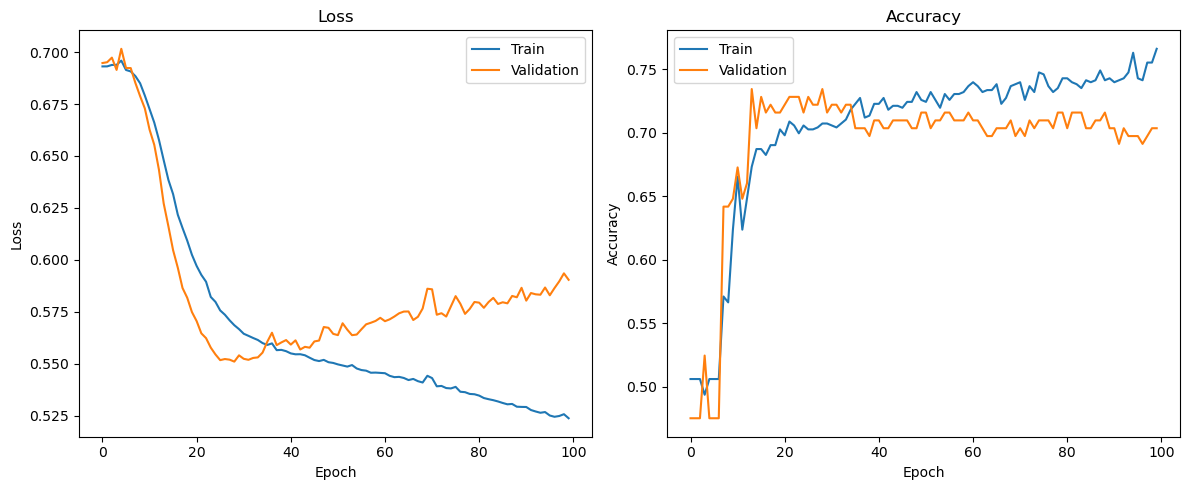

Test Loss: 0.5912, Test Accuracy: 0.6735

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 1
True: 0, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0


In [282]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class DataPreprocessor:
    def __init__(self):
        '''
        Initiate X and y with resampled values
        Initiate X_test and y_test with test values
        '''
        # Assuming you have variables:
        # - cancer_x_resampled, cancer_y_resampled (from under-sampling)
        # - cancer_x_test, cancer_y_test (from the initial train-test split)
        
        # Use cancer dataset for training
        self.X = cancer_x_resampled.values
        self.y = cancer_y_resampled.values
        self.X_test = cancer_x_test.values
        self.y_test = cancer_y_test.values

    def preprocess(self):
        '''
        Split the resampled data into training and validation sets (80% train, 20% val)
        '''
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initialize weights with random normal numbers (mean=0, std=0.01).
        You need 2 weight matrices: from input to hidden and from hidden to output.
        Initialize bias vectors with zeros.
        '''
        self.weights1 = np.random.normal(0, 0.01, (input_size, hidden_size))
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.normal(0, 0.01, (hidden_size, output_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of the sigmoid function.
        '''
        return x * (1 - x)

    def forward(self, X):
        '''
        Do the forward phase. Propagate inputs through weights, sum up with biases,
        then pass the results through activation function.
        '''
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        Backpropagation algorithm to update weights and biases.
        '''
        m = X.shape[0]

        # Step 1: Output layer error
        dz2 = output - y  # Difference between predicted and true labels

        # Step 2: Gradients for Output Layer Weights and Biases
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Step 3: Hidden layer error
        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)

        # Step 4: Gradients for Hidden Layer Weights and Biases
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Step 5: Updating Weights and Biases
        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1

class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]

            for i in range(0, m, self.batch_size):
                # Get the current batch data
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward pass
                output = self.model.forward(X_batch)

                # Backward pass and update
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate train loss and accuracy
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(
                self.y_train * np.log(train_output + 1e-8) + 
                (1 - self.y_train) * np.log(1 - train_output + 1e-8)
            )
            train_pred = (train_output >= 0.5).astype(int)
            train_accuracy = np.mean(train_pred == self.y_train)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(
                self.y_val * np.log(val_output + 1e-8) + 
                (1 - self.y_val) * np.log(1 - val_output + 1e-8)
            )
            val_pred = (val_output >= 0.5).astype(int)
            val_accuracy = np.mean(val_pred == self.y_val)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, "
                      f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        Forward the test data in the trained model, compute the BCE loss, then compute binary accuracy.
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(
            self.y_test * np.log(test_output + 1e-8) + 
            (1 - self.y_test) * np.log(1 - test_output + 1e-8)
        )
        test_pred = (test_output >= 0.5).astype(int)
        test_accuracy = np.mean(test_pred == self.y_test)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

# Main execution
if __name__ == "__main__":
    # Ensure that all necessary variables are loaded before this point
    # For example, cancer_x_resampled, cancer_y_resampled, cancer_x_test, cancer_y_test

    # Preprocess data
    preprocessor = DataPreprocessor()
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=100, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = preprocessor.y_test[i][0]
        predicted_label = int(test_output[i][0] >= 0.5)
        print(f"True: {true_label}, Predicted: {predicted_label}")


Epoch 10/100, Train Loss: 0.6926, Train Acc: 0.5135, Val Loss: 0.6944, Val Acc: 0.4459
Epoch 20/100, Train Loss: 0.6892, Train Acc: 0.5135, Val Loss: 0.6946, Val Acc: 0.4459
Epoch 30/100, Train Loss: 0.6741, Train Acc: 0.5980, Val Loss: 0.6863, Val Acc: 0.5541
Epoch 40/100, Train Loss: 0.6534, Train Acc: 0.6351, Val Loss: 0.6808, Val Acc: 0.6216
Epoch 50/100, Train Loss: 0.6332, Train Acc: 0.6824, Val Loss: 0.6668, Val Acc: 0.5811
Epoch 60/100, Train Loss: 0.6137, Train Acc: 0.6791, Val Loss: 0.6705, Val Acc: 0.6081
Epoch 70/100, Train Loss: 0.6043, Train Acc: 0.6689, Val Loss: 0.6759, Val Acc: 0.5946
Epoch 80/100, Train Loss: 0.5982, Train Acc: 0.6689, Val Loss: 0.6806, Val Acc: 0.5946
Epoch 90/100, Train Loss: 0.5938, Train Acc: 0.6858, Val Loss: 0.6799, Val Acc: 0.5946
Epoch 100/100, Train Loss: 0.5909, Train Acc: 0.6858, Val Loss: 0.6779, Val Acc: 0.6081


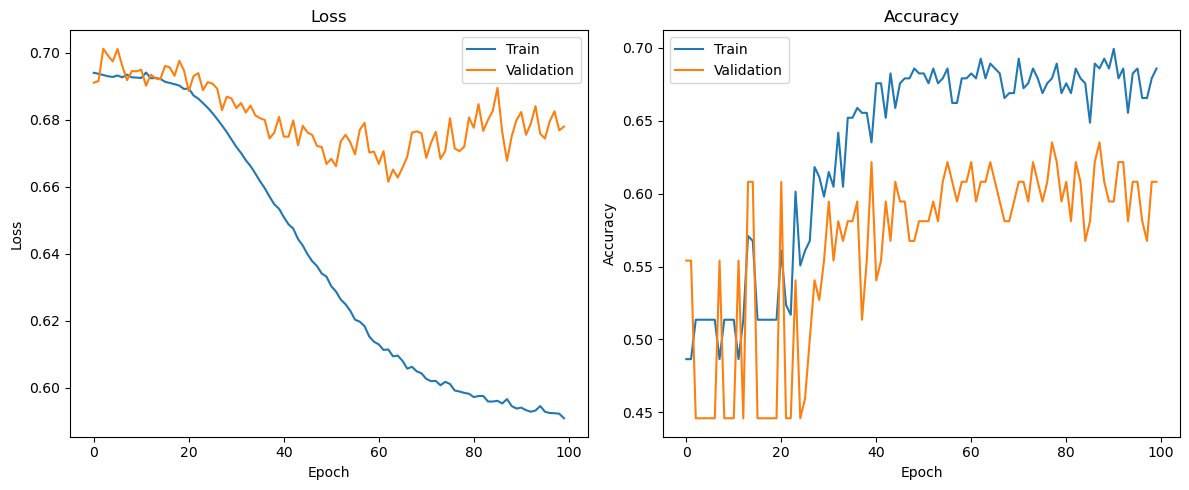

Test Loss: 0.7489, Test Accuracy: 0.5287

Example predictions:
True: 0, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 1
True: 0, Predicted: 0


In [283]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class DataPreprocessor:
    def __init__(self):
        '''
        Initiate X and y with resampled values
        Initiate X_test and y_test with test values
        '''
        # Assuming you have variables:
        # - cancer_x_resampled, cancer_y_resampled (from under-sampling)
        # - cancer_x_test, cancer_y_test (from the initial train-test split)
        
        # Use cancer dataset for training
        self.X = liver_x_resampled.values
        self.y = liver_y_resampled.values
        self.X_test = liver_x_test.values
        self.y_test = liver_y_test.values

    def preprocess(self):
        '''
        Split the resampled data into training and validation sets (80% train, 20% val)
        '''
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initialize weights with random normal numbers (mean=0, std=0.01).
        You need 2 weight matrices: from input to hidden and from hidden to output.
        Initialize bias vectors with zeros.
        '''
        self.weights1 = np.random.normal(0, 0.01, (input_size, hidden_size))
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.normal(0, 0.01, (hidden_size, output_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of the sigmoid function.
        '''
        return x * (1 - x)

    def forward(self, X):
        '''
        Do the forward phase. Propagate inputs through weights, sum up with biases,
        then pass the results through activation function.
        '''
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        Backpropagation algorithm to update weights and biases.
        '''
        m = X.shape[0]

        # Step 1: Output layer error
        dz2 = output - y  # Difference between predicted and true labels

        # Step 2: Gradients for Output Layer Weights and Biases
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Step 3: Hidden layer error
        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)

        # Step 4: Gradients for Hidden Layer Weights and Biases
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Step 5: Updating Weights and Biases
        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1

class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]

            for i in range(0, m, self.batch_size):
                # Get the current batch data
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward pass
                output = self.model.forward(X_batch)

                # Backward pass and update
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate train loss and accuracy
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(
                self.y_train * np.log(train_output + 1e-8) + 
                (1 - self.y_train) * np.log(1 - train_output + 1e-8)
            )
            train_pred = (train_output >= 0.5).astype(int)
            train_accuracy = np.mean(train_pred == self.y_train)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(
                self.y_val * np.log(val_output + 1e-8) + 
                (1 - self.y_val) * np.log(1 - val_output + 1e-8)
            )
            val_pred = (val_output >= 0.5).astype(int)
            val_accuracy = np.mean(val_pred == self.y_val)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, "
                      f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        Forward the test data in the trained model, compute the BCE loss, then compute binary accuracy.
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(
            self.y_test * np.log(test_output + 1e-8) + 
            (1 - self.y_test) * np.log(1 - test_output + 1e-8)
        )
        test_pred = (test_output >= 0.5).astype(int)
        test_accuracy = np.mean(test_pred == self.y_test)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

# Main execution
if __name__ == "__main__":
    # Ensure that all necessary variables are loaded before this point
    # For example, cancer_x_resampled, cancer_y_resampled, cancer_x_test, cancer_y_test

    # Preprocess data
    preprocessor = DataPreprocessor()
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=100, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = preprocessor.y_test[i][0]
        predicted_label = int(test_output[i][0] >= 0.5)
        print(f"True: {true_label}, Predicted: {predicted_label}")